<a 
    target="_blank" 
    href="https://colab.research.google.com/github/davidgasquez/gitcoin-grants-data-portal/blob/main/notebooks/python-quickstart.ipynb"> 
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

There are multiple ways you can access the latest datasets. Use the one you like more!

Datasets are pushed to IPFS periodically. You can access the latest version of the datasets using the [IPNS address on any gateway](https://ipfs.filebase.io/ipns/k51qzi5uqu5dhn3p5xdkp8n6azd4l1mma5zujinkeewhvuh5oq4qvt7etk9tvc/):

```
k51qzi5uqu5dhn3p5xdkp8n6azd4l1mma5zujinkeewhvuh5oq4qvt7etk9tvc
```

For example, let's see the top rounds by number of contributors.

In [10]:
import pandas as pd

df = pd.read_parquet(
    "https://ipfs.filebase.io/ipns/k51qzi5uqu5dhn3p5xdkp8n6azd4l1mma5zujinkeewhvuh5oq4qvt7etk9tvc/rounds.parquet"
)

df.sort_values("unique_contributors", ascending=False).head(5)[
    ["id", "name", "votes", "unique_contributors"]
]

,id,name,votes,unique_contributors
213,0x8de918f0163b2021839a8d84954dd7e8e151326d,Web3 Open Source Software,202259,39706
516,0xd4cc0dd193c7dc1d665ae244ce12d7fab337a008,Web3 Open Source Software,133859,26250
138,0x984e29dcb4286c2d9cbaa2c238afdd8a191eefbc,Gitcoin Citizens Round #1: Retroactive funding,57366,17023
517,0x98720dd1925d34a2453ebc1f91c9d48e7e89ec29,Web3 Community and Education,52290,16707
422,0x12bb5bbbfe596dbc489d209299b8302c3300fa40,Web3 Open Source Software Round,81870,14554


Pretty simple, right?

IPNS can be slow, so you can also find the [latest IPFS CID on the `IPFS_CID` file in the GitHub repository](https://github.com/davidgasquez/gitcoin-grants-data-portal/blob/main/data/IPFS_CID). You can use that CID to access the latest version of the datasets on any gateway.

In [24]:
import requests

LATEST_IPFS_CID = requests.get(
    "https://raw.githubusercontent.com/davidgasquez/gitcoin-grants-data-portal/main/data/IPFS_CID"
).text.strip()

GATEWAY_URL = f"https://ipfs.filebase.io/ipfs/{LATEST_IPFS_CID}/"

np = pd.read_parquet(GATEWAY_URL + "projects.parquet").size

print(f"Number of projects: {np}")

Number of projects: 63196


Finally, you can get the data by using `grant-data.xyz`! It'll redirect you to the latest IPFS CID.

In [32]:
pd.read_parquet("http://grant-data.xyz/rounds.parquet").sort_values(
    "unique_contributors", ascending=False
).head(5)[["id", "name", "votes", "unique_contributors"]]

,id,name,votes,unique_contributors
213,0x8de918f0163b2021839a8d84954dd7e8e151326d,Web3 Open Source Software,202259,39706
516,0xd4cc0dd193c7dc1d665ae244ce12d7fab337a008,Web3 Open Source Software,133859,26250
138,0x984e29dcb4286c2d9cbaa2c238afdd8a191eefbc,Gitcoin Citizens Round #1: Retroactive funding,57366,17023
517,0x98720dd1925d34a2453ebc1f91c9d48e7e89ec29,Web3 Community and Education,52290,16707
422,0x12bb5bbbfe596dbc489d209299b8302c3300fa40,Web3 Open Source Software Round,81870,14554


For example, let's see the number of votes per round.

You're not limited to Pandas, you can use any tool you like. For example, let's use DuckDB to query the data.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

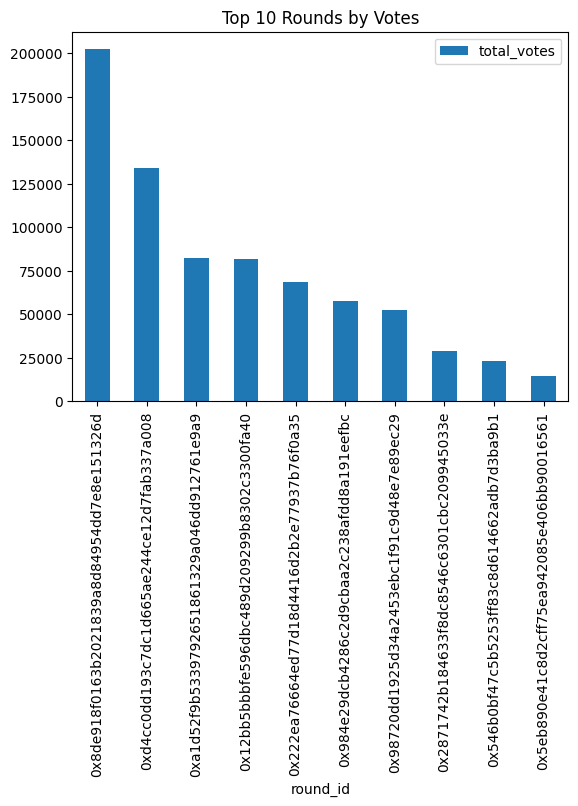

In [33]:
import duckdb

_ = (
    duckdb.sql(
        f"""
        select
            round_id,
            count(distinct id) as total_votes
        from '{GATEWAY_URL}/round_votes.parquet'
        group by round_id
        order by 2 desc
        limit 10;
        """
    )
    .df()
    .plot.bar(x="round_id", y="total_votes", title="Top 10 Rounds by Votes")
)

We can see for example the top contributors for chain `1`.

In [34]:
duckdb.sql(
    f"""
    select
        voter,
        sum(amount_usd)
    from '{GATEWAY_URL}/round_votes.parquet'
    where chain_id = 1
    group by 1
    order by 2 desc
    limit 10
    """
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,voter,sum(amount_usd)
0,0x8a205728f464b0755f72780df1763d1e1f0f5ba5,8087.002244
1,0xbd4eb0295468c80725017f74113f5aebbd6e8d12,6810.616077
2,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,5887.459406
3,0xd88d5b3dbe8790369799012310c31eb210eeec81,5079.673008
4,0xc81dd383d028fe6dc99f66b7db235eaea05ef9ec,5039.444640
5,0x0fc338d0a925fa564171d1d7c0ffdb271ad19d49,4723.094377
6,0x471e96a01962b62fe3e9e8e367f6be56e3e983d0,4596.338842
7,0xc6d7522f7b012b22bc365c9c43b3dbf13b9aaff9,3420.906163
8,0xb13b2db51ca77ea06b1d3e83f2615006e9a4bdad,3199.346490
9,0xd21d931890d27b6e7e2e668f27931e17698e90f1,3194.710788


#### Passport Scores

In [35]:
duckdb.sql(
    f"from '{GATEWAY_URL}/passport_scores.parquet' order by last_score_timestamp desc limit 10"
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,address,score,status,last_score_timestamp,evidence_type,evidence_success,evidence_raw_score,evidence_threshold
0,0x63e6aff7158c83ac3a53a8f13527e03b8749584d,0,DONE,2024-01-25 07:31:36.493000+00:00,ThresholdScoreCheck,false,19.939548,20.00000
1,0xa95a660fb7688bef90d134fd31f0801c045ce24f,1,DONE,2024-01-25 07:31:34.993000+00:00,ThresholdScoreCheck,true,24.159658,20.00000
2,0x767dc1a5292fed4ebb7bbf80b983dc2b3ee1bed4,0,DONE,2024-01-25 07:31:34.984000+00:00,ThresholdScoreCheck,false,17.748914,20.00000
3,0xd7f6693a609b5356cd406ba794c0cef749661a2a,1,DONE,2024-01-25 07:31:34.146000+00:00,ThresholdScoreCheck,true,28.474060,20.00000
4,0x02d961c0ceb9641dbd5ad86705c5f911b40084ee,0,DONE,2024-01-25 07:31:32.358000+00:00,ThresholdScoreCheck,false,10.557658,20.00000
5,0xdeda6e9e9c7ca8b7a27f68135b9158ed6240c7a0,0,DONE,2024-01-25 07:31:31.761000+00:00,ThresholdScoreCheck,false,19.650292,20.00000
6,0x1b2724b98423864614faa3b56a14104972aca418,0,DONE,2024-01-25 07:31:30.956000+00:00,ThresholdScoreCheck,false,5.714268,20.00000
7,0x7cbb41c9389e929127b10b3609e73fadfd7eb5eb,0,DONE,2024-01-25 07:31:30.801000+00:00,ThresholdScoreCheck,false,15.729414,20.00000
8,0x6b66003996bcdca11be528394981cd529406cc6e,0,DONE,2024-01-25 07:31:29.059000+00:00,ThresholdScoreCheck,false,5.114390,20.00000
9,0xc745bfddcae4accd93738f599ca28201c004e282,0,DONE,2024-01-25 07:31:28.679000+00:00,ThresholdScoreCheck,false,0.510878,20.00000


### Projects

In [36]:
duckdb.sql(
    f"from '{GATEWAY_URL}/projects.parquet' order by created_at desc limit 5"
).df()

,project_id,project_number,meta_ptr,metadata,owners,created_at_block,chain_id,title,description,website,project_twitter,logo_image,banner_image,created_at
0,0xb70e3b2674ab3c2b1a70431fe7373301ddc789a74047...,1756,bafkreihayexicrdcpm33qasqndtqihscqv6nsky3uuays...,"{""title"": ""Jinni Health"", ""description"": ""**A ...",[0x6B1050C1C6B288C79Ac1db299Dc481048aBBBbcD],115272841,10,Jinni Health,**A Self-Actualization Game Based On Tomogatch...,https://jinni.health,kibagateaux,bafkreidwdhw3ncpev7hiaryduzcrqpjpvnlb7zixoi364...,bafkreidtabrerwu5ydjngdqsxmtzsglen2fzrtct5lfnj...,1.706144e+12
1,0x0be3539b02b2875b10e361fc90a607cb8f84e3d22de1...,1755,bafkreidcvs5nhx7hn3fdwxztriwgke22m5orcq6z72ipg...,"{""title"": ""NeuroFusion"", ""description"": ""Neuro...",[0x547b67d30052ee6999e85DDb6e8b28495eA6B5FE],115271063,10,NeuroFusion,"Neurotechnology is rapidly gaining prominence,...",https://usefusion.app/research/,usefusionapp,bafkreieyth5wd4t7pq6fmetuaqvufgxvnsxw5sfwiug7u...,bafkreifmzcy56dtqq6bwxolxg5md4xjsxgodp3fqfkzmv...,1.706141e+12
2,0xd64698966ec5f31cf0ab9d35e99acc78bda24e7e7da8...,1754,bafkreiagxxc5o6ul3lvz3gux3egckc7xc5zb4vm64j3wn...,"{""title"": ""viaPrize"", ""description"": ""# The pr...",[0x850a146D7478dAAa98Fc26Fd85e6A24e50846A9d],115269831,10,viaPrize,# The problem\nWhen my loved ones in Ecuador l...,https://viaprize.org,viaprize,bafkreieyn45cfuktpbquxlw2hm7blpwub3ofvb3br4paz...,bafkreiema55cymdygu2ncqv6vbhzsfa7umx35rhu2phcv...,1.706138e+12
3,0x1e56278e98dc996805a31cd23a7e498027684df9e0f8...,1753,bafkreidnatr646vrqdvjtcfevedeuiqlm42xxrstm73wt...,"{""title"": ""The Archipelago in Thailand Scoutin...",[0x850a146D7478dAAa98Fc26Fd85e6A24e50846A9d],115269739,10,The Archipelago in Thailand Scouting,Tl;dr\n\nMultiple groups will join together in...,https://shorturl.at/eswz4,None,bafkreidp5kn7bmms6z6x2bsw4xuaek2fyss2s345f4sdc...,bafkreibgi3pnck2blsj4otb6ht25gga6zayepxvod4jcy...,1.706138e+12
4,0x23ad43003dbb0de079d59ae591922bbf9464664ff8f3...,1752,bafkreiftwzdhrfg5fhyi2oleko74vsocb3dhogiqwnw7j...,"{""title"": ""Jinni Health"", ""description"": ""**A ...",[0x6B1050C1C6B288C79Ac1db299Dc481048aBBBbcD],115269189,10,Jinni Health,**A Self-Actualization Game Based On Tomogatch...,https://jinni.health,KibaGateaux,bafkreiczsh5ynfkkxxz7w52i5horp4xs7fykfuyfoonit...,bafkreidtabrerwu5ydjngdqsxmtzsglen2fzrtct5lfnj...,1.706137e+12


### Rounds

In [37]:
duckdb.sql(
    f"from '{GATEWAY_URL}/rounds.parquet' order by created_at_block desc limit 10"
).df()

,id,amount_usd,votes,token,match_amount,match_amount_usd,unique_contributors,application_meta_ptr,application_metadata,meta_ptr,...,applications_end_time,round_start_time,round_end_time,created_at_block,updated_at_block,chain_id,name,round_type,program_address,sybil_defense
0,0x18a72e9940fb81860a809e266ebec42a9e2c44ce,193.691170,154,0xaf88d065e77c8cc2239327c5edb3a432268e5831,1.000000e+09,999.792780,42,bafkreigxtuyead3ees5qrvxtp7cbif6milnqrukfc7iod...,"{'lastUpdatedOn': 1704900881291, 'applicationS...",bafkreiewbmrff2vhgdvk3jpizwnlhidgkccog2kqktvlz...,...,1.709251e+09,1704931200,1.709251e+09,169066590,169066590,42161,LunCo Case Study,public,0x263e7a6b847cd432ee9d6f20cc843672ce046e03,False
1,0xb2f565fe282feaab2c1644d52c31d48609aa2154,0.000000,0,0x0000000000000000000000000000000000000000,1.000000e+20,237003.888340,0,bafkreihapduprlt4inat46ue2zmacyszb5jlfztnvh3bn...,"{'lastUpdatedOn': 1704875989742, 'applicationS...",bafkreib7axqrnu2c4kejnvwxpbprwb76qxuplktkq6lqw...,...,1.705709e+09,1704931200,1.705709e+09,168967203,168967203,42161,Satoshi Airlines,public,0x74217758d4031dd26ed3fe4942695d3531660153,False
2,0x82321ccd62d15af6eaa550de053c9ca7b6063c70,0.000000,0,0x912ce59144191c1204e64559fe8253a0e49e6548,1.000000e+23,190349.313000,0,bafkreiedyxeszxd4bl5oubxrrdtksy5wlrvpy3qmospze...,"{'lastUpdatedOn': 1704874977912, 'applicationS...",bafkreiacwrtssiswwni5s2jztpccnlgtgv7c2irc2lngr...,...,1.706659e+09,1704931200,1.706659e+09,168963153,168963153,42161,Satoshi Airlines,public,0x0cfdbc54779dda484439c5f9352141674588d7c7,True
3,0xe0a6f4e932b16c85318a77de43b7048863c522d2,17.723946,3,0x912ce59144191c1204e64559fe8253a0e49e6548,1.000000e+20,107.158592,1,bafkreia2qz6iwittp5jg5q44i6zvedgccfnlumn6vs6uf...,"{'lastUpdatedOn': 1701883086748, 'applicationS...",bafkreihaa3ec73fsujtba4xf6svwc6cyef2xjjl2weafv...,...,1.702166e+09,1701993540,1.702166e+09,157497847,157497847,42161,GPT Internal Round,private,0xd6d47d4f0b2384ab2df470c6a16e3fd241b8fb2b,False
4,0xc283bc8656c3d4ca1fad0e41214f36c9ca370603,0.000000,0,0x912ce59144191c1204e64559fe8253a0e49e6548,1.000000e+20,109.056016,0,bafkreibk3lzkasdvzsuinbotaimkwv6nhxee2zp2amrf5...,"{'lastUpdatedOn': 1701541787075, 'applicationS...",bafkreic2z4h33bicge6afddigf3fivulb2aoaosui7fnq...,...,1.701724e+09,1701561600,1.701724e+09,156241985,156241985,42161,GPT Round Internal,private,0xe71d74a696fd8b80a5aa770dd582fb52ec17f9a9,False
5,0x302dbc8eb3bf73565a1205648b61b23cb3f72ff7,8796.982192,2971,0x912ce59144191c1204e64559fe8253a0e49e6548,7.500000e+22,74864.222250,1058,bafkreibq4qfldppjpmcwmdgj6e2cz6weqihwyzqd4gu5g...,"{'lastUpdatedOn': 1701102231738, 'applicationS...",bafkreia3okgfhb4367ro6qawohqqqi4zbydd44ybsshow...,...,1.702426e+09,1701129600,1.702426e+09,154645606,154645606,42161,American Cancer Society,public,0xc869181c8ad1d3689a9ccaa1321eb106f518895a,False
6,0xadb87c22964fb8d79c294162b3c0a3b03c505ebf,0.000000,0,0xaf88d065e77c8cc2239327c5edb3a432268e5831,5.000000e+08,499.981425,0,bafkreideewpkktzagxbcpljwl7xlnpjs5ctta2lo33pzs...,"{'lastUpdatedOn': 1701098056494, 'applicationS...",bafkreigspqpzoo4bhdvgfyub4zt2ayzmfiy2mppxm5lgf...,...,1.703290e+09,1702252800,1.703290e+09,154629810,154629810,42161,LunCo Alpha QF,public,0x263e7a6b847cd432ee9d6f20cc843672ce046e03,False
7,0xadd7212a6ef2985484b08a5c227721a57a1f50bc,0.000000,0,0x0000000000000000000000000000000000000000,3.700000e+19,74620.795709,0,bafkreidjtodp7owb5b6ta2gzdjn7gn3bn4lo47tbb3dd6...,"{'lastUpdatedOn': 1701097316391, 'applicationS...",bafkreih4ppi3wtqfhhlsfyxrgfabhdtuljokn7igrt552...,...,1.702426e+09,1701129600,1.702426e+09,154626834,154626834,42161,American Cancer Society,private,0x4d272ea21f84db89424fc81c49040cc583853bdc,False
8,0x822742805c0596e883aba99ba2f3117e8c49b94a,0.000000,0,0x0000000000000000000000000000000000000000,7.530000e+19,159631.419511,0,bafkreia7ri3lvr7rt2cxwns2t5m2ckq2bjjw47lcin7ol...,"{'lastUpdatedOn': 1700842457598, 'applicationS...",bafkreif5ngqx6qporajw2uiqlpysqbdzogkllg6pn2gra...,...,1.702339e+09,1701086400,1.702339e+09,153655116,153655116,42161

### Votes

In [38]:
duckdb.sql(
    f"from '{GATEWAY_URL}/round_votes.parquet' order by amount_usd desc limit 10"
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,chain_id,round_id,id,transaction,block_number,project_id,application_id,voter,grant_address,token,amount,amount_usd,amount_round_token
0,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xb200421dc21e966761f94e508ce5480239c1852ab639...,0x6f53b32c4bad4efe6642da540b2e8698c17df85edbf8...,67744603,0x05d5e2edfb321593560def03f77b7c30ed4533f6a9db...,2,0x4a03721c829ae3d448bf37cac21527cbe75fc4cb,0x4a03721c829ae3d448bf37cac21527cbe75fc4cb,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.111110e+23,111079.112254,5.442536e+23
1,424,0xd4cc0dd193c7dc1d665ae244ce12d7fab337a008,0xe724e8845d530b3db1b3a2e5764c76f8881b88b9c68e...,0xf5fdd4f2e20d6ae1268f1a49390a208028d4f0bbe2c4...,6078325,0x20636c87f66406e917bd61ef99d029bd0dad28d27140...,25,0xa29744b745800ccd814e6f59271ecd74682eccb0,0xb6091aab544ef253c23a37295953aafc9d836681,0x0000000000000000000000000000000000000000,1.500000e+19,30872.648709,3.099092e+22
2,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xeca8c67a58b5d16ba9e6818dab974bae2efaaf5612df...,0x1c060e3e101f8d795d5ba081acefc98c59b8565adeb4...,67661917,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0x1f8e87f31b60aed9c71f32eb997bc499394bea1d,0xdf24702c11dba5874fcd891f7f45a15a77824058,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.999900e+22,19998.754212,9.397697e+22
3,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x94584eddf1391e4516664ca7b47f0cf92a81fc35bd30...,0xd940a5fb188af23525588600740ab56a61c9e16421da...,68329567,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0xb0d57cd79adc1d9aec41f30faec203550bbe1a72,0x0393856410e8f78553479c6d39527adbaaebc51c,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.500000e+22,14993.699400,7.845908e+22
4,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xc627d7e3f66532e664dea73d2b20d68b84cddf56c43e...,0x3ea023c82587bf501768b8d351c09de79362f95979b3...,68329613,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x98705b13faf6d6792fb4ef147d6079ba8b2d9bab,0x0393856410e8f78553479c6d39527adbaaebc51c,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.500000e+22,14993.699400,7.845908e+22
5,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x44c34e30e8f8c81d26624c650ebaf461ff1f26f1b03c...,0x2372a11c7ffcf87bbf0891d455aab550f3a711135efb...,68330150,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x28ba3468f5962e30c9d2a47f3ce5a51b2727c3b5,0x0393856410e8f78553479c6d39527adbaaebc51c,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.500000e+22,14993.699400,7.845908e+22
6,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x1c0be11fc1bd772145f3def92ccc39738b4c9429e01e...,0xd38495842fa1764aec5b0d8b77f6dea731887f80a070...,68330300,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0xb8c538324e29b29aef03decd20f1e6b3711556bb,0x0393856410e8f78553479c6d39527adbaaebc51c,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.500000e+22,14993.699400,7.845908e+22
7,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x96c206094681b6e505b83d57a384b498a6ae2173857b...,0xd68ff905b8f25b305f4305d0da25140c14a8714fbcd4...,68330617,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x105188ae2a7daf9aba2e9afb50cd93ecfe3daf88,0x0393856410e8f78553479c6d39527adbaaebc51c,0x83791638da5eb2faa432aff1c65fba47c5d29510,1.500000e+22,14993.699400,7.845908e+22
8,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x93c1c59d7ee9dc3fbea37fc7bdb930c30eb579433810...,0x42a8cdc59ac9fb5e31c4086558548459a8a3a7e9de8a...,67661627,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0xd6980b8f28d0b6fa89b7476841e341c57508a3f6,0xdf24702c11dba5874fcd891f7f45a15a77824058,0x83791638da5eb2faa432aff1c65fba47c5d29510,9.999000e+21,9998.877112,4.698613e+22
9,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xff6eecfe39ad5637fae0094777919ac0f58c527e049e...,0x15d00066b4da54845a794677e8b0132600c0a9c048f4...,67701528,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0x26dcb0d7d48aa979da81f2fce331ce6e028b00d7,0xdf24702c11dba5874fcd891f7f45a15a77824058,0x83791638da5eb2faa432aff1c65fba47c5d29510,9.999000e+21,9995.691231,4.998367e+22
